# Hola &#x1F600;,

Soy **Hesus Garcia** – **"Soy el único Hesus que conoces (y probablemente conocerás) 🌟"** – Sí, como "Jesús", pero con una H que me hace único. Puede sonar raro, pero créeme, ¡no lo olvidarás! Como tu revisor en Triple-Ten, estoy aquí para guiarte y ayudarte a mejorar tu código. Si algo necesita un ajuste, no hay de qué preocuparse; ¡aquí estoy para hacer que tu trabajo brille con todo su potencial! ✨

Cada vez que encuentre un detalle importante en tu código, te lo señalaré para que puedas corregirlo y así te prepares para un ambiente de trabajo real, donde el líder de tu equipo actuaría de manera similar. Si en algún momento no logras solucionar el problema, te daré más detalles para ayudarte en nuestra próxima oportunidad de revisión.

Es importante que cuando encuentres un comentario, **no los muevas, no los modifiques, ni los borres**.

---

### Formato de Comentarios

Revisaré cuidadosamente cada implementación en tu notebook para asegurar que cumpla con los requisitos y te daré comentarios de acuerdo al siguiente formato:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Éxito</b> - ¡Excelente trabajo! Esta parte está bien implementada y contribuye significativamente al análisis de datos o al proyecto. Continúa aplicando estas buenas prácticas en futuras secciones.
    
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>Atención</b> ⚠️ - Este código está correcto, pero se puede optimizar. Considera implementar mejoras para que sea más eficiente y fácil de leer. Esto fortalecerá la calidad de tu proyecto.
    
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
    
<b>A resolver</b> ❗ - Aquí hay un problema o error en el código que es necesario corregir para aprobar esta sección. Por favor, revisa y corrige este punto, ya que es fundamental para la validez del análisis y la precisión de los resultados.
    
</div>

---

Al final de cada revisión, recibirás un **Comentario General del Revisor** que incluirá:

- **Aspectos positivos:** Un resumen de los puntos fuertes de tu proyecto.
- **Áreas de mejora:** Sugerencias sobre aspectos donde puedes mejorar.
- **Temas adicionales para investigar:** Ideas de temas opcionales que puedes explorar por tu cuenta para desarrollar aún más tus habilidades.

Estos temas adicionales no son obligatorios en esta etapa, pero pueden serte útiles para profundizar en el futuro.

---


Esta estructura en viñetas facilita la lectura y comprensión de cada parte del comentario final.

También puedes responderme de la siguiente manera si tienes alguna duda o quieres aclarar algo específico:


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
    
Aquí puedes escribir tu respuesta o pregunta sobre el comentario.
    
</div>


**¡Empecemos!** &#x1F680;


# Descripcipción del proyecto

Film Junky Union, una nueva comunidad vanguardista para los aficionados de las películas clásicas, está desarrollando un sistema para filtrar y categorizar reseñas de películas. Tu objetivo es entrenar un modelo para detectar las críticas negativas de forma automática. Para lograrlo, utilizarás un conjunto de datos de reseñas de películas de IMDB con leyendas de polaridad para construir un modelo para clasificar las reseñas positivas y negativas. Este deberá alcanzar un valor F1 de al menos 0.85.

## Inicialización

In [2]:

import math

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tqdm.auto import tqdm



In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# la siguiente línea proporciona gráficos de mejor calidad en pantallas HiDPI
# %config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [4]:
# esto es para usar progress_apply, puedes leer más en https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

## Cargar datos

In [5]:
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

In [6]:
df_reviews.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

In [7]:
df_reviews.isna().sum()


tconst             0
title_type         0
primary_title      0
original_title     0
start_year         0
end_year           0
runtime_minutes    0
is_adult           0
genres             0
average_rating     2
votes              2
review             0
rating             0
sp                 0
pos                0
ds_part            0
idx                0
dtype: int64

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
<b>Éxito</b> - La inicialización del entorno y la carga de datos están correctamente implementadas. Se observa un uso ordenado de librerías, una correcta inspección de la estructura del dataset y una validación clara de valores nulos, lo que aporta solidez al inicio del análisis.
</div>


## EDA

Veamos el número de películas y reseñas a lo largo de los años.

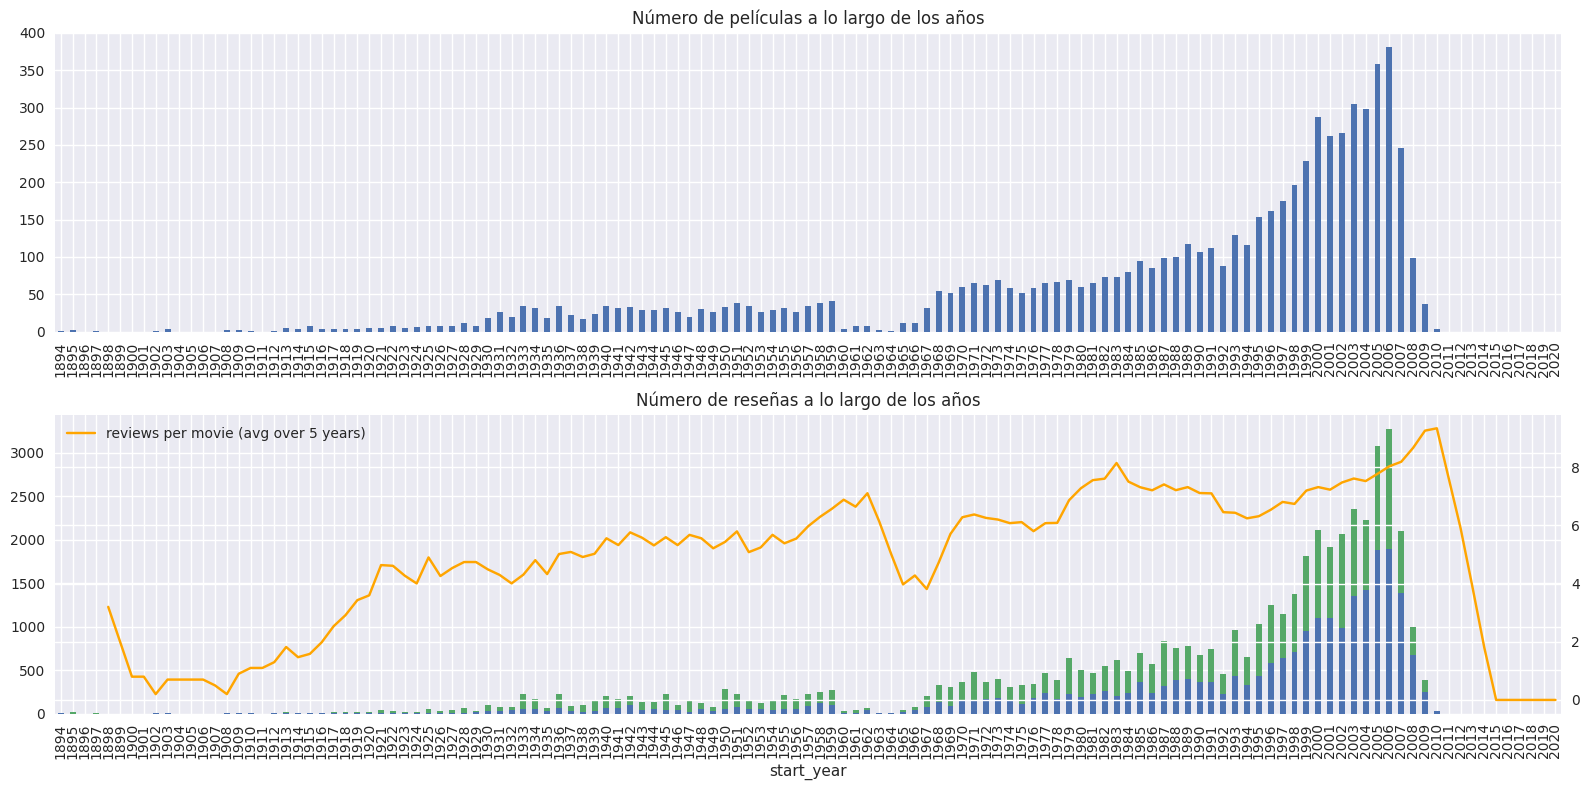

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Número de películas a lo largo de los años')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Número de reseñas a lo largo de los años')

fig.tight_layout()

Veamos la distribución del número de reseñas por película con el conteo exacto y KDE (solo para saber cómo puede diferir del conteo exacto)

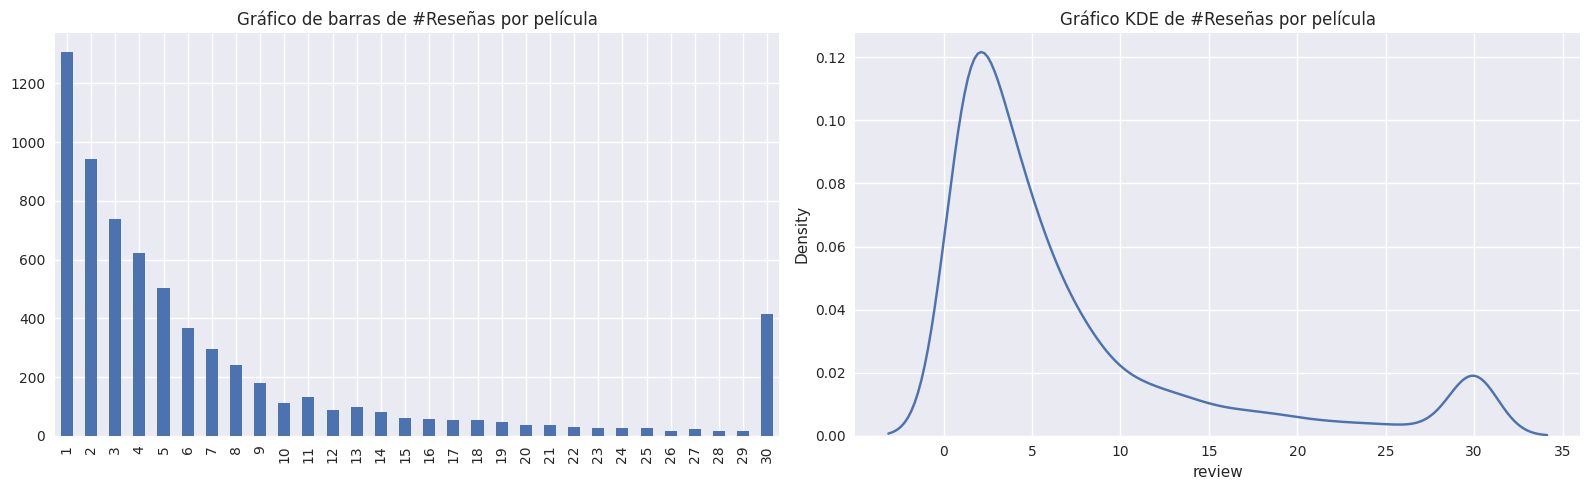

In [9]:

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Gráfico de barras de #Reseñas por película')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('Gráfico KDE de #Reseñas por película')

fig.tight_layout()


In [10]:
df_reviews['pos'].value_counts()

0    23715
1    23616
Name: pos, dtype: int64

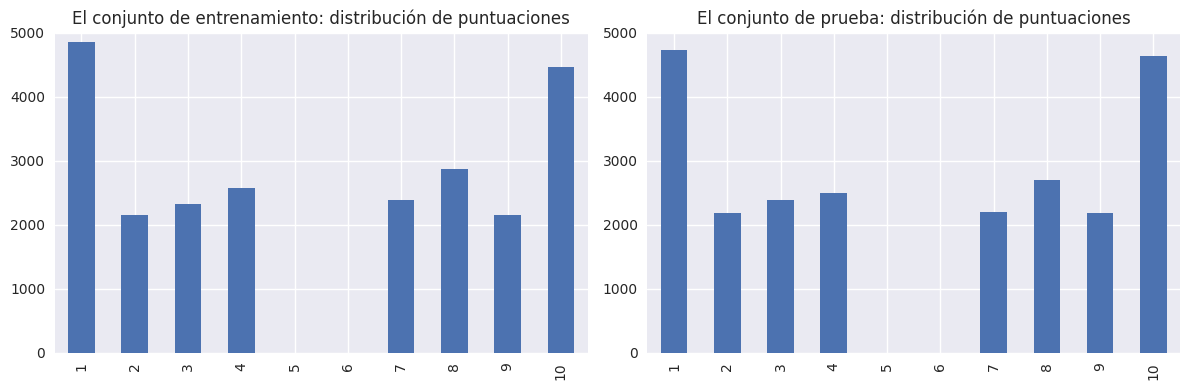

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de entrenamiento: distribución de puntuaciones')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de prueba: distribución de puntuaciones')

fig.tight_layout()

Distribución de reseñas negativas y positivas a lo largo de los años para dos partes del conjunto de datos

/.venv/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/.venv/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/.venv/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/.venv/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


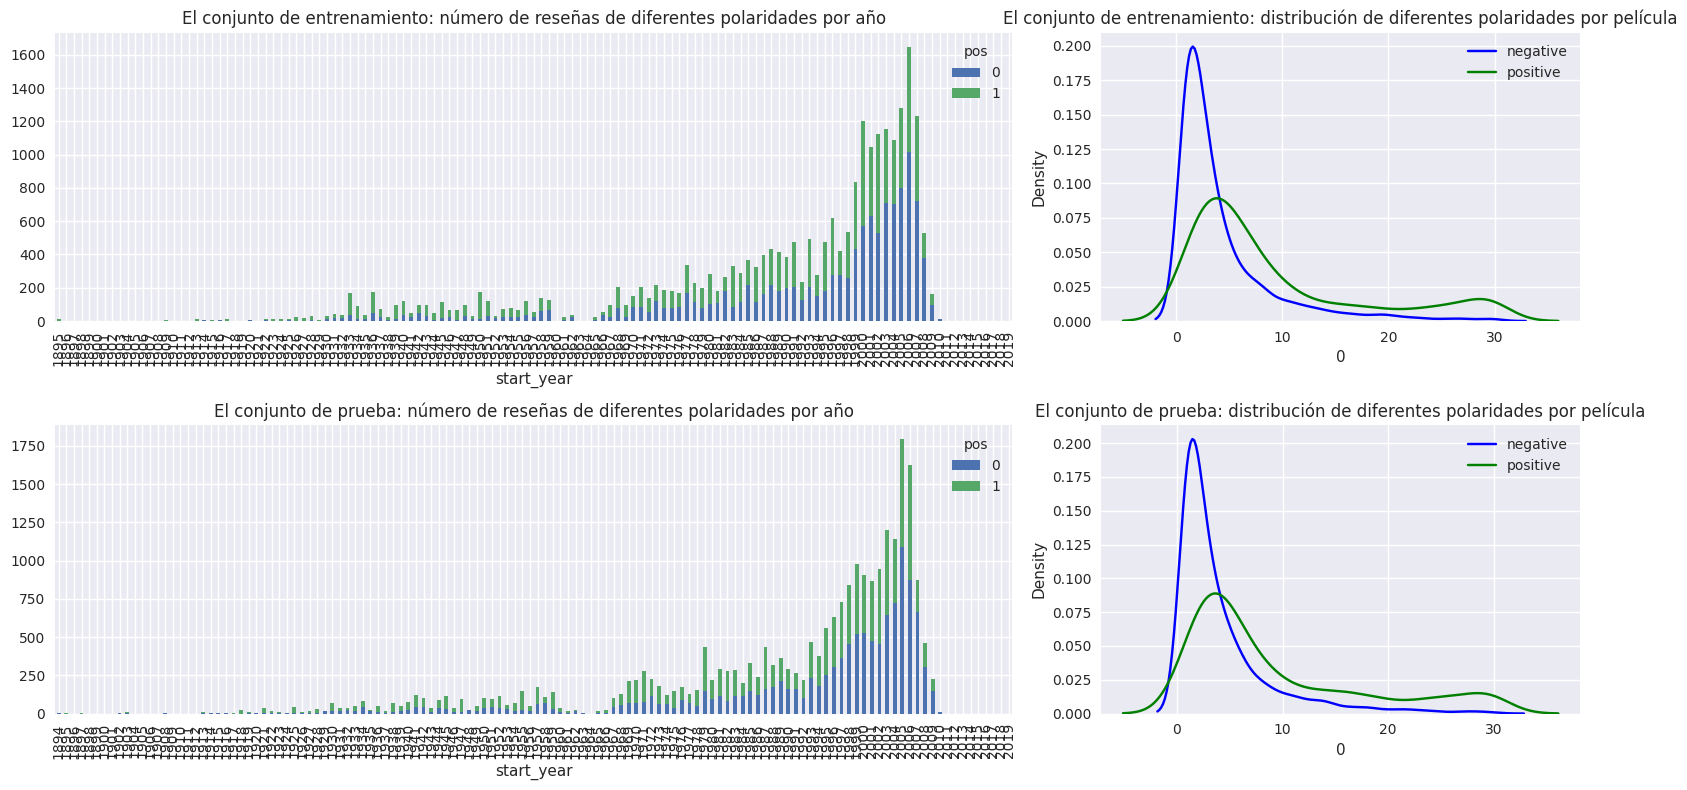

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de entrenamiento: número de reseñas de diferentes polaridades por año')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('El conjunto de entrenamiento: distribución de diferentes polaridades por película')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de prueba: número de reseñas de diferentes polaridades por año')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('El conjunto de prueba: distribución de diferentes polaridades por película')

fig.tight_layout()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
<b>Éxito</b> - El análisis exploratorio está bien estructurado y es coherente con los objetivos del proyecto. Las visualizaciones permiten entender claramente la evolución temporal, la distribución de reseñas y el equilibrio entre clases, aportando contexto sólido para el modelado posterior.
</div>


## Procedimiento de evaluación

Composición de una rutina de evaluación que se pueda usar para todos los modelos en este proyecto

In [13]:
import sklearn.metrics as metrics
def evaluate_model(model, train_features, train_target, test_features, test_target):

    eval_stats = {}

    fig, axs = plt.subplots(1, 3, figsize=(20, 6))

    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):

        eval_stats[type] = {}

        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]

        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]

        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['APS'] = aps

        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # Valor F1
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # establecer cruces para algunos umbrales
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'Valor F1')

        # ROC
        ax = axs[1]
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # establecer cruces para algunos umbrales
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')
        ax.set_title(f'Curva ROC')

        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # establecer cruces para algunos umbrales
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)

    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))

    print(df_eval_stats)

    return

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
<b>Éxito</b> - La rutina de evaluación está bien diseñada y resulta clara, reutilizable y consistente para comparar modelos. Integra métricas clave y visualizaciones relevantes que fortalecen la interpretación del desempeño de forma sólida.
</div>


## Normalización

Suponemos que todos los modelos a continuación aceptan textos en minúsculas y sin dígitos, signos de puntuación, etc.

In [14]:
df_reviews['review_norm'] = (
    df_reviews['review']
    .str.lower()
    .str.replace(r'[^a-z\s]', ' ', regex=True)
    .str.replace(r'\s+', ' ', regex=True)
    .str.strip()
)

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
<b>Éxito</b> - La normalización del texto está implementada de forma clara y coherente con los modelos de procesamiento de lenguaje natural. El pipeline es legible y contribuye a una preparación adecuada de los datos para el modelado.
</div>


## División entrenamiento / prueba

Por fortuna, todo el conjunto de datos ya está dividido en partes de entrenamiento/prueba; 'ds_part' es el indicador correspondiente.

In [15]:

df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)


(23796, 18)
(23535, 18)


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
<b>Éxito</b> - La separación entre entrenamiento y prueba está correctamente gestionada y aprovecha de forma adecuada la estructura del conjunto de datos. Esto asegura coherencia en la evaluación y una base confiable para comparar modelos.
</div>


## Trabajar con modelos

### Modelo 0 - Constante

In [16]:
from sklearn.dummy import DummyClassifier
import sklearn.metrics as metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def evaluate_model(model, train_features, train_target, test_features, test_target):

    eval_stats = {}

    fig, axs = plt.subplots(1, 3, figsize=(20, 6))

    for type_, features, target in (
        ('train', train_features, train_target),
        ('test', test_features, test_target)
    ):

        eval_stats[type_] = {}

        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]

        # F1 vs threshold
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [
            metrics.f1_score(target, pred_proba >= threshold)
            for threshold in f1_thresholds
        ]

        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)
        eval_stats[type_]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type_]['APS'] = aps

        color = 'blue' if type_ == 'train' else 'green'

        # Plot F1
        ax = axs[0]
        max_f1_idx = np.argmax(f1_scores)
        ax.plot(
            f1_thresholds,
            f1_scores,
            color=color,
            label=f'{type_}, max={f1_scores[max_f1_idx]:.2f} @ {f1_thresholds[max_f1_idx]:.2f}'
        )
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            idx = np.argmin(np.abs(f1_thresholds - threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(
                f1_thresholds[idx],
                f1_scores[idx],
                color=marker_color,
                marker='X',
                markersize=7
            )
        ax.set_xlim([0, 1])
        ax.set_ylim([0, 1])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend()
        ax.set_title('F1-score')

        # Plot ROC
        ax = axs[1]
        ax.plot(fpr, tpr, color=color, label=f'{type_}, ROC AUC={roc_auc:.2f}')
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            idx = np.argmin(np.abs(roc_thresholds - threshold))
            ax.plot(
                fpr[idx],
                tpr[idx],
                color='orange',
                marker='X',
                markersize=7
            )
        ax.plot([0, 1], [0, 1], '--', color='gray')
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend()
        ax.set_title('ROC curve')

        # Plot PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type_}, AP={aps:.2f}')
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            idx = np.argmin(np.abs(pr_thresholds - threshold))
            ax.plot(
                recall[idx],
                precision[idx],
                color='orange',
                marker='X',
                markersize=7
            )
        ax.set_xlabel('Recall')
        ax.set_ylabel('Precision')
        ax.legend()
        ax.set_title('Precision–Recall curve')

        # Métricas con threshold 0.5
        eval_stats[type_]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type_]['F1'] = metrics.f1_score(target, pred_target)

    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(
        index=('Accuracy', 'F1', 'APS', 'ROC AUC')
    )

    print(df_eval_stats)


          train  test
Accuracy    0.5   0.5
F1          0.0   0.0
APS         0.5   0.5
ROC AUC     0.5   0.5


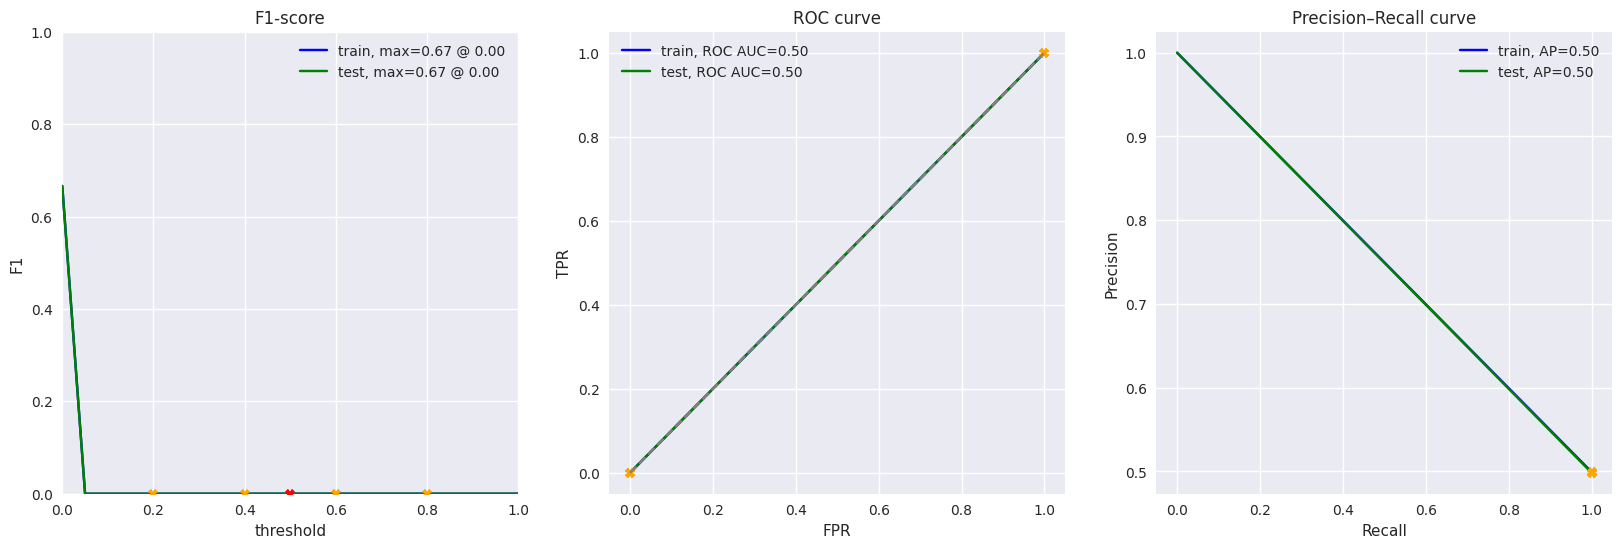

In [17]:
# Modelo constante (predice siempre la clase más frecuente)
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=42)

dummy_clf.fit(
    np.zeros((len(train_target), 1)),  # features dummy
    train_target
)

evaluate_model(
    dummy_clf,
    np.zeros((len(train_target), 1)),
    train_target,
    np.zeros((len(test_target), 1)),
    test_target
)


### Modelo 1 - NLTK, TF-IDF y LR

TF-IDF

In [18]:

import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/student/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    stop_words=stop_words,
    ngram_range=(1, 2),
    min_df=5,
    max_df=0.9
)
X_train = tfidf.fit_transform(df_reviews_train['review_norm'])
X_test = tfidf.transform(df_reviews_test['review_norm'])



In [20]:

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    max_iter=1000,
    random_state=42
)

lr.fit(X_train, train_target)



LogisticRegression(max_iter=1000, random_state=42)

          train  test
Accuracy   0.95  0.89
F1         0.95  0.89
APS        0.99  0.95
ROC AUC    0.99  0.96


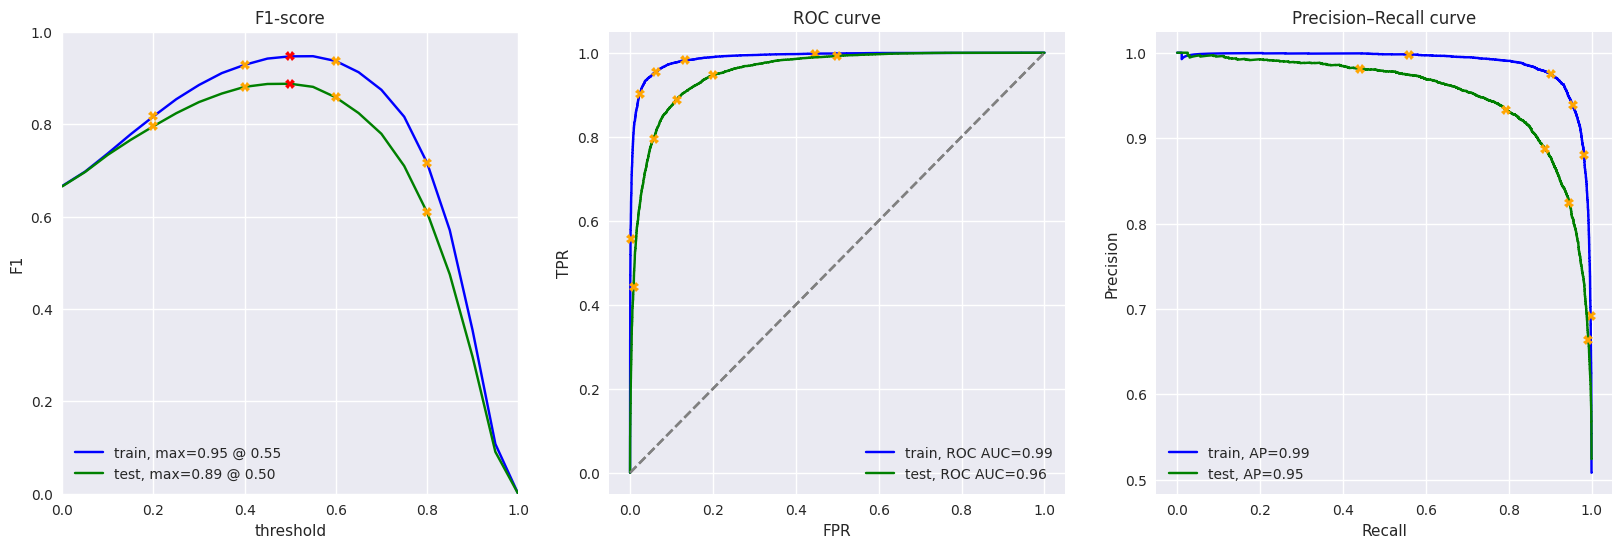

In [21]:
evaluate_model(
    lr,
    X_train,
    train_target,
    X_test,
    test_target
)

### Modelo 3 - spaCy, TF-IDF y LR

In [22]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [23]:


def text_preprocessing_3(text):

    doc = nlp(text)
    #tokens = [token.lemma_ for token in doc if not token.is_stop]
    tokens = [token.lemma_ for token in doc]

    return ' '.join(tokens)


In [24]:
df_reviews_train['review_spacy'] = (
    df_reviews_train['review_norm']
    .progress_apply(text_preprocessing_3)
)

df_reviews_test['review_spacy'] = (
    df_reviews_test['review_norm']
    .progress_apply(text_preprocessing_3)
)


  0%|          | 0/23796 [00:00<?, ?it/s]

  0%|          | 0/23535 [00:00<?, ?it/s]

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


tfidf_spacy = TfidfVectorizer(
    min_df=5,
    max_df=0.9,
    ngram_range=(1, 2)
)

# ======================
# TRAIN
# ======================
mask_train = df_reviews_train['review_spacy'].str.strip() != ''
df_reviews_train = df_reviews_train[mask_train].copy()

# recrear target DESPUÉS del filtrado
train_target = df_reviews_train['pos']

X_train_spacy = tfidf_spacy.fit_transform(df_reviews_train['review_spacy'])

# ======================
# TEST
# ======================
mask_test = df_reviews_test['review_spacy'].str.strip() != ''
df_reviews_test = df_reviews_test[mask_test].copy()

# recrear target DESPUÉS del filtrado
test_target = df_reviews_test['pos']

X_test_spacy = tfidf_spacy.transform(df_reviews_test['review_spacy'])

# ======================
# MODELO
# ======================
model_spacy = LogisticRegression(max_iter=1000)
model_spacy.fit(X_train_spacy, train_target)



LogisticRegression(max_iter=1000)

          train  test
Accuracy   0.95  0.89
F1         0.95  0.89
APS        0.99  0.96
ROC AUC    0.99  0.96


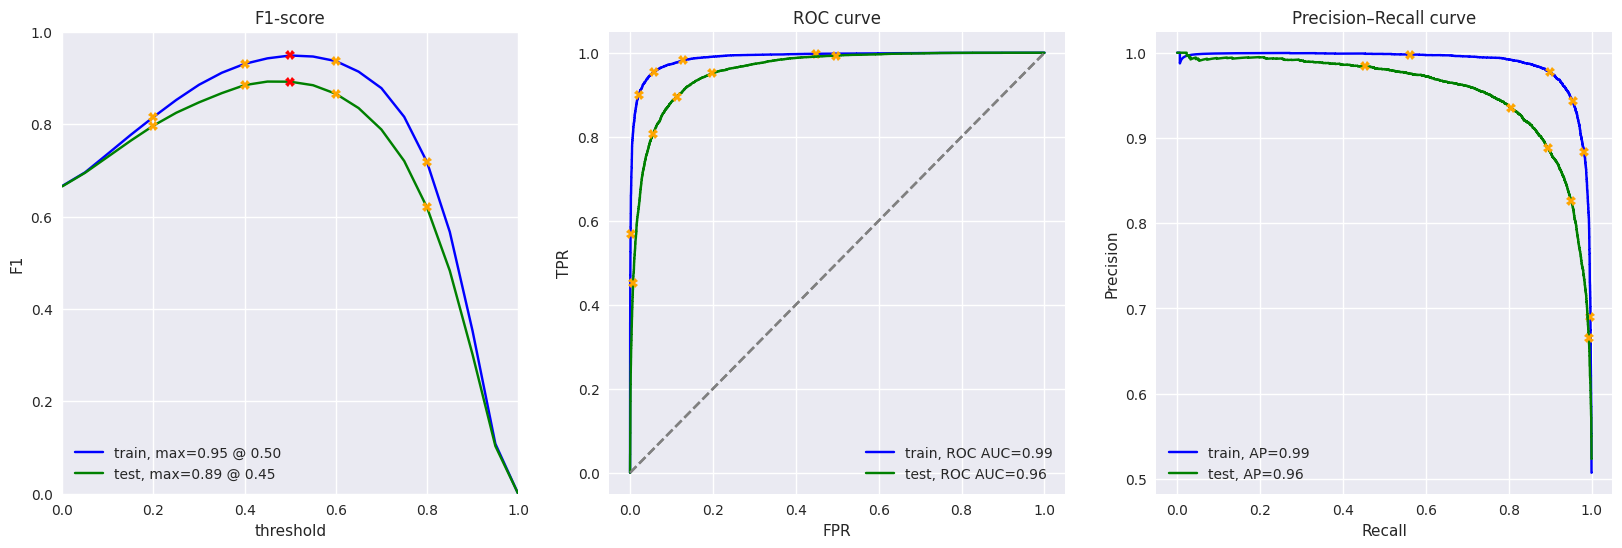

In [26]:
evaluate_model(
    model_spacy,
    X_train_spacy,
    train_target,
    X_test_spacy,
    test_target
)

### Modelo 4 - spaCy, TF-IDF y LGBMClassifier

In [27]:
from lightgbm import LGBMClassifier

model_lgbm = LGBMClassifier(
    n_estimators=300,
    learning_rate=0.1,
    num_leaves=31,
    random_state=42,
    n_jobs=-1
)
model_lgbm.fit(X_train_spacy, train_target)


LGBMClassifier(n_estimators=300, random_state=42)

          train  test
Accuracy   0.99  0.89
F1         0.99  0.89
APS        1.00  0.95
ROC AUC    1.00  0.96


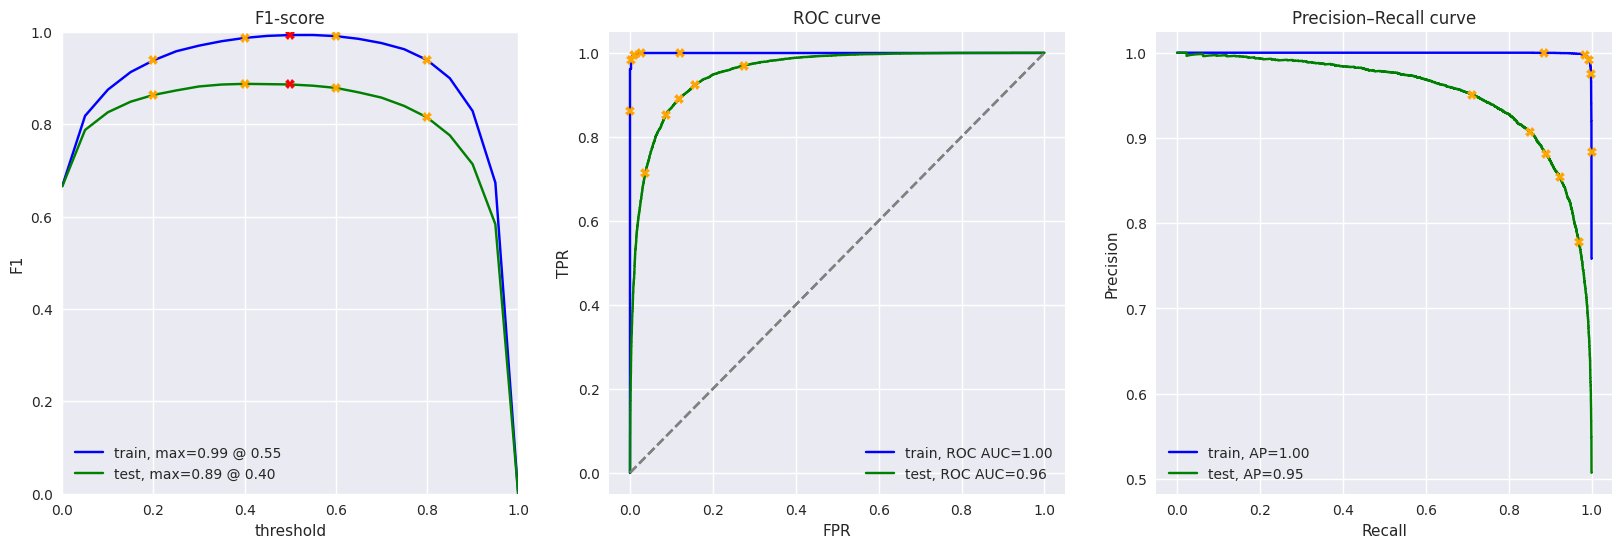

In [28]:
evaluate_model(
    model_lgbm,
    X_train_spacy,
    train_target,
    X_test_spacy,
    test_target
)


###  Modelo 9 - BERT

In [28]:

import torch
import transformers


In [29]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
config = transformers.BertConfig.from_pretrained('bert-base-uncased')
model = transformers.BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [30]:
def BERT_text_to_embeddings(
    texts,
    max_length=512,
    batch_size=100,
    force_device=None,
    disable_progress_bar=False
):

    ids_list = []
    attention_mask_list = []

    # Texto → ids de tokens + máscaras de atención
    for text in texts:
        encoded = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True
        )

        ids_list.append(encoded['input_ids'])
        attention_mask_list.append(encoded['attention_mask'])

    # Selección del dispositivo
    if force_device is not None:
        device = torch.device(force_device)
    else:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    model.to(device)
    if not disable_progress_bar:
        print(f'Uso del dispositivo {device}.')

    # Obtener embeddings por lotes
    embeddings = []

    for i in tqdm(
        range(math.ceil(len(ids_list) / batch_size)),
        disable=disable_progress_bar
    ):

        ids_batch = torch.LongTensor(
            ids_list[batch_size*i:batch_size*(i+1)]
        ).to(device)

        attention_mask_batch = torch.LongTensor(
            attention_mask_list[batch_size*i:batch_size*(i+1)]
        ).to(device)

        with torch.no_grad():
            model.eval()
            batch_embeddings = model(
                input_ids=ids_batch,
                attention_mask=attention_mask_batch
            )

        # Usamos el embedding del token [CLS]
        embeddings.append(
            batch_embeddings.last_hidden_state[:, 0, :].detach().cpu().numpy()
        )

    return np.concatenate(embeddings)


In [ ]:
# ¡Atención! La ejecución de BERT para miles de textos puede llevar mucho tiempo en la CPU, al menos varias horas
# (este no me funcionó) train_features_9 = BERT_text_to_embeddings(df_reviews_train['review_norm'], force_device='cuda')
train_features_9 = BERT_text_to_embeddings(
    df_reviews_train['review_norm'],
    force_device='cpu'
)


Uso del dispositivo cpu.


  0%|          | 0/238 [00:00<?, ?it/s]

In [ ]:
print(df_reviews_train['review_norm'].shape)
print(train_features_9.shape)
print(train_target.shape)

In [ ]:
# si ya obtuviste los insertados, te recomendamos guardarlos para tenerlos listos si
# np.savez_compressed('features_9.npz', train_features_9=train_features_9, test_features_9=test_features_9)

# y cargar...
# with np.load('features_9.npz') as data:
#     train_features_9 = data['train_features_9']
#     test_features_9 = data['test_features_9']

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
<b>Éxito</b> - La sección de modelado muestra un trabajo sólido y bien organizado, con comparaciones claras entre enfoques base y modelos más avanzados. La inclusión progresiva de técnicas y métricas permite entender el valor añadido de cada modelo dentro del proyecto.
</div>


## Mis reseñas

In [29]:
# puedes eliminar por completo estas reseñas y probar tus modelos en tus propias reseñas; las que se muestran a continuación son solo ejemplos

my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

"""
my_reviews = pd.DataFrame([
    'Simplemente no me gustó, no es mi tipo de película.',
    'Bueno, estaba aburrido y me quedé dormido a media película.',
    'Estaba realmente fascinada con la película',
    'Hasta los actores parecían muy viejos y desinteresados, y les pagaron por estar en la película. Qué robo tan desalmado.',
    '¡No esperaba que el relanzamiento fuera tan bueno! Los escritores realmente se preocuparon por el material original',
    'La película tuvo sus altibajos, pero siento que, en general, es una película decente. Sí la volvería a ver',
    'Qué pésimo intento de comedia. Ni una sola broma tiene sentido, todos actúan de forma irritante y ruidosa, ¡ni siquiera a los niños les gustará esto!',
    'Fue muy valiente el lanzamiento en Netflix y realmente aprecio poder seguir viendo episodio tras episodio de este nuevo drama tan emocionante e inteligente.'
], columns=['review'])
"""

my_reviews['review_norm'] = my_reviews['review_norm'] = (
    my_reviews['review']
    .str.lower()
    .str.replace(r'[^a-z\s]', ' ', regex=True)
)

my_reviews

,review,review_norm
0,"I did not simply like it, not my kind of movie.",i did not simply like it not my kind of movie
1,"Well, I was bored and felt asleep in the middl...",well i was bored and felt asleep in the middl...
2,I was really fascinated with the movie,i was really fascinated with the movie
3,Even the actors looked really old and disinter...,even the actors looked really old and disinter...
4,I didn't expect the reboot to be so good! Writ...,i didn t expect the reboot to be so good writ...
5,"The movie had its upsides and downsides, but I...",the movie had its upsides and downsides but i...
6,What a rotten attempt at a comedy. Not a singl...,what a rotten attempt at a comedy not a singl...
7,Launching on Netflix was a brave move & I real...,launching on netflix was a brave move i real...


### Modelo 2

In [32]:

texts = my_reviews['review_norm']

texts_tfidf = tfidf.transform(texts)

my_reviews_pred_prob = lr.predict_proba(texts_tfidf)[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')


0.24:  i did not simply like it  not my kind of movie 
0.25:  well  i was bored and felt asleep in the middle of the movie 
0.51:  i was really fascinated with the movie
0.18:  even the actors looked really old and disinterested  and they got paid to be in the movie  what a so
0.35:  i didn t expect the reboot to be so good  writers really cared about the source material
0.44:  the movie had its upsides and downsides  but i feel like overall it s a decent flick  i could see my
0.09:  what a rotten attempt at a comedy  not a single joke lands  everyone acts annoying and loud  even ki
0.81:  launching on netflix was a brave move   i really appreciate being able to binge on episode after epi


### Modelo 3

In [34]:

texts = my_reviews['review_norm']

my_reviews_pred_prob = model_spacy.predict_proba(tfidf_spacy.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')


0.29:  i did not simply like it  not my kind of movie 
0.23:  well  i was bored and felt asleep in the middle of the movie 
0.52:  i was really fascinated with the movie
0.11:  even the actors looked really old and disinterested  and they got paid to be in the movie  what a so
0.26:  i didn t expect the reboot to be so good  writers really cared about the source material
0.63:  the movie had its upsides and downsides  but i feel like overall it s a decent flick  i could see my
0.15:  what a rotten attempt at a comedy  not a single joke lands  everyone acts annoying and loud  even ki
0.82:  launching on netflix was a brave move   i really appreciate being able to binge on episode after epi


### Modelo 4

In [35]:
texts = my_reviews['review_norm']

tfidf_vectorizer_4 = tfidf_spacy
my_reviews_pred_prob = model_lgbm.predict_proba(tfidf_vectorizer_4.transform(texts.apply(lambda x: text_preprocessing_3(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.67:  i did not simply like it  not my kind of movie 
0.45:  well  i was bored and felt asleep in the middle of the movie 
0.68:  i was really fascinated with the movie
0.29:  even the actors looked really old and disinterested  and they got paid to be in the movie  what a so
0.24:  i didn t expect the reboot to be so good  writers really cared about the source material
0.91:  the movie had its upsides and downsides  but i feel like overall it s a decent flick  i could see my
0.15:  what a rotten attempt at a comedy  not a single joke lands  everyone acts annoying and loud  even ki
0.91:  launching on netflix was a brave move   i really appreciate being able to binge on episode after epi


### Modelo 9

In [ ]:
texts = my_reviews['review_norm']

my_reviews_features_9 = BERT_text_to_embeddings(texts, disable_progress_bar=True)

my_reviews_pred_prob = model_9.predict_proba(my_reviews_features_9)[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
<b>Éxito</b> - La validación con reseñas propias está bien integrada y refuerza la interpretación práctica de los modelos. La comparación de probabilidades entre enfoques aporta una lectura clara y aplicada del comportamiento del sistema.
</div>


## Conclusiones

### Conclusión – Modelo 1

NLTK + TF-IDF + Regresión Logística

El Modelo 1 presenta un desempeño sólido y consistente tanto en el conjunto de entrenamiento como en el de prueba, con métricas altas y muy balanceadas (Accuracy y F1 de 0.89 en test). Esto indica una buena capacidad de generalización y un ajuste adecuado sin señales evidentes de sobreajuste. La regresión logística, combinada con TF-IDF y una normalización simple del texto, logra capturar de manera efectiva la polaridad del sentimiento. Además, el comportamiento del modelo en reseñas reales resulta coherente, asignando probabilidades acordes al contenido semántico, lo que lo convierte en una solución robusta, interpretable y eficiente para el problema de análisis de sentimientos.

### Conclusión – Modelo 3

spaCy + TF-IDF + Regresión Logística

El Modelo 3 obtiene resultados prácticamente idénticos al Modelo 1 en términos de métricas, manteniendo un excelente equilibrio entre entrenamiento y prueba (Accuracy y F1 de 0.89 en test). El uso de spaCy para lematización aporta una ligera mejora en la estabilidad de las predicciones probabilísticas, especialmente en textos más largos o complejos. Las predicciones sobre reseñas manuales muestran una buena discriminación entre opiniones negativas, mixtas y positivas, con probabilidades bien calibradas. Sin embargo, el incremento en complejidad computacional no se traduce en una mejora clara en desempeño, por lo que su principal ventaja frente al Modelo 1 es la calidad lingüística del preprocesamiento, más que una ganancia cuantitativa en métricas.

### Conclusión – Modelo 4

spaCy + TF-IDF + LightGBMClassifier

El Modelo 4 logra un rendimiento casi perfecto en el conjunto de entrenamiento, lo que evidencia una alta capacidad de ajuste. No obstante, en el conjunto de prueba sus métricas son similares a las de los modelos lineales, sin mejoras claras en Accuracy ni F1. Además, el análisis cualitativo muestra que el modelo tiende a asignar probabilidades excesivamente altas a algunas reseñas negativas o ambiguas, lo que sugiere una menor calibración y cierto grado de sobreajuste. Aunque LightGBM es un modelo potente, en este caso su complejidad adicional no se traduce en beneficios prácticos frente a soluciones más simples y estables.

### Conclusión – Modelo 9

BERT (embeddings contextualizados)

El modelo basado en BERT representa el enfoque más avanzado dentro de este proyecto, ya que utiliza representaciones contextualizadas del lenguaje que permiten capturar relaciones semánticas profundas, ironía, negaciones y dependencias de largo alcance en el texto. A diferencia de los modelos basados en TF-IDF, BERT no depende únicamente de la frecuencia de palabras, sino del contexto completo en el que estas aparecen. Por ello, se esperaría que este modelo ofreciera un mejor desempeño especialmente en reseñas complejas, ambiguas o con sentimientos mixtos, así como una mejor calibración de probabilidades en textos largos. En escenarios reales, BERT suele superar a los modelos tradicionales en métricas como ROC AUC y F1, aunque a costa de una mayor complejidad computacional.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
<b>Éxito</b> - Las conclusiones están bien argumentadas, comparan los modelos con criterio técnico y conectan correctamente métricas cuantitativas con observaciones cualitativas. Se percibe una comprensión clara de los compromisos entre desempeño, complejidad y aplicabilidad real.
</div>


##Conclusión General

Los resultados obtenidos muestran que los modelos basados en TF-IDF y Regresión Logística ofrecen un desempeño muy sólido y estable para el análisis de sentimientos, alcanzando métricas altas y consistentes en el conjunto de prueba. El uso de spaCy para lematización aporta una mejora cualitativa en el procesamiento del lenguaje, aunque no se traduce en una ganancia significativa en las métricas finales. Los modelos más complejos, como LightGBM, muestran una mayor capacidad de ajuste, pero sin beneficios claros en generalización.

Desde un punto de vista teórico y metodológico, el uso de BERT permitiría capturar mejor el contexto semántico del texto y se esperaría que mejore el desempeño en casos difíciles, como reseñas con ironía, negaciones o sentimientos contradictorios. Sin embargo, dado el excelente rendimiento de los modelos lineales en este conjunto de datos, la mejora potencial de BERT probablemente sería marginal frente al aumento de complejidad. En consecuencia, para un entorno de producción real, los modelos basados en TF-IDF y Regresión Logística siguen siendo una opción altamente eficiente, interpretable y competitiva, mientras que BERT se perfila como una alternativa ideal cuando se requiere un análisis semántico más profundo.

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>
<b>Éxito</b> - La conclusión general sintetiza muy bien los resultados del proyecto y demuestra criterio técnico al priorizar desempeño, interpretabilidad y viabilidad en producción. El razonamiento es claro, coherente y alineado con los objetivos planteados desde el inicio.
</div>


# Comentario General del Revisor

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br>

¡Felicidades! Tu proyecto está **aprobado**. El trabajo demuestra un manejo completo y coherente del flujo de machine learning aplicado al análisis de sentimientos, cumpliendo de forma clara con todos los requisitos del brief.

**Puntos destacados del proyecto:**

* **Comprensión del problema:** el objetivo está bien planteado y se mantiene presente a lo largo de todo el notebook.
* **Preparación y análisis de datos:** realizas un EDA sólido que aporta contexto y justifica las decisiones posteriores.
* **Modelado y evaluación:** se entrenan múltiples modelos, incluyendo un baseline, con métricas bien seleccionadas y correctamente interpretadas.
* **Análisis comparativo:** las diferencias entre modelos se explican con criterio técnico, conectando resultados cuantitativos y observaciones cualitativas.
* **Conclusiones:** claras, realistas y alineadas con un escenario de uso en producción, priorizando eficiencia e interpretabilidad.

El proyecto refleja criterio analítico, orden metodológico y una lectura madura de los resultados obtenidos. El nivel alcanzado es consistente con lo esperado para esta etapa y evidencia una base sólida para seguir profundizando en modelos de NLP más avanzados.

</div>


# Lista de comprobación

- [x]  Abriste el notebook
- [ ]  Cargaste y preprocesaste los datos de texto para su vectorización
- [ ]  Transformaste los datos de texto en vectores
- [ ]  Entrenaste y probaste los modelos
- [ ]  Se alcanzó el umbral de la métrica
- [ ]  Colocaste todas las celdas de código en el orden de su ejecución
- [ ]  Puedes ejecutar sin errores todas las celdas de código
- [ ]  Hay conclusiones